In [9]:
from __future__ import annotations

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm
import pickle
import gymnasium as gym

env = gym.make("CartPole-v1")

In [10]:
done = False
observation, info = env.reset()

pos_space = np.linspace(-2.4, 2.4, 10)
vel_space = np.linspace(-3, 3, 10)
ang_space = np.linspace(-0.2, 0.2, 10)
tip_vel_space = np.linspace(-3, 3, 10)

In [11]:
class RandomCartPoleAgent:
    def __init__(self, env):
        self.env = env
    def get_action(self):
        return self.env.action_space.sample()

In [12]:
class ModelBenchmarkingCartPoleAgent:
    def __init__(
        self,
        model: np.ndarray[np.float64],
    ):
        self.actions = list(range(env.action_space.n))
        self.model = model

    

    def get_state(self, obs):
        pos, vel, ang, tip_vel = obs
        pos_bin = np.digitize(pos, pos_space)
        vel_bin = np.digitize(vel, vel_space)
        ang_bin = np.digitize(ang, ang_space)
        tip_vel_bin = np.digitize(tip_vel, tip_vel_space)
        return pos_bin, vel_bin, ang_bin, tip_vel_bin

    def get_action(self, obs):
        state = self.get_state(obs)
        return int(np.argmax(self.model[state]))



In [13]:
file = open("q_values_10b100kit.pkl", "rb")
model = pickle.load(file)
file.close()
agent = ModelBenchmarkingCartPoleAgent(
    model=model
)

In [14]:
n_episodes = 1000
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        obs = next_obs

100%|██████████| 1000/1000 [00:04<00:00, 207.41it/s]


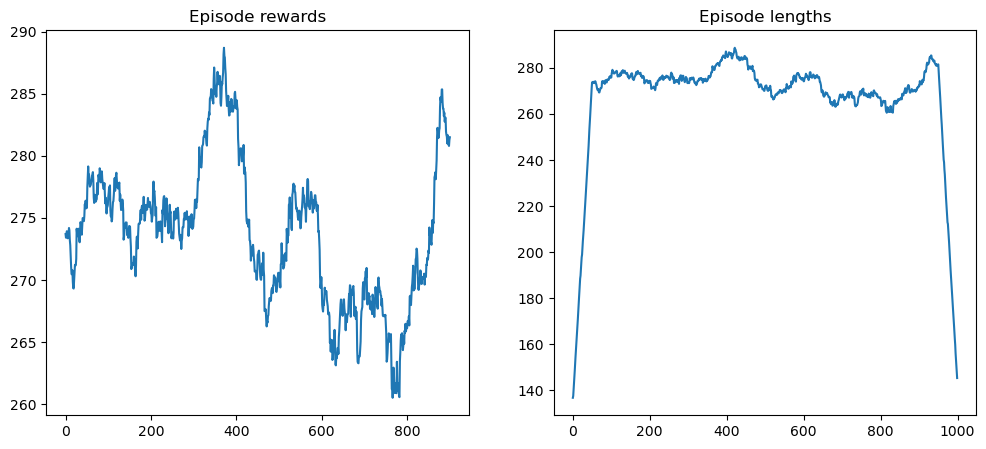

In [15]:
rolling_length = 100
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode lengths")
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)

In [17]:

env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
agent = RandomCartPoleAgent(env)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action()
        next_obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        obs = next_obs

  0%|          | 0/1000 [00:00<?, ?it/s]


ValueError: Attempted to add episode stats when they already exist

In [ ]:
rolling_length = 100
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode lengths")
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)